In [73]:
import xgboost
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

In [74]:
!pip install xgboost==1.4.2

In [75]:
import os
os.getcwd()

'C:\\Users\\jakub\\Desktop\\WBproj\\proj2\\DNN'

## Expired

In [76]:
train_exp = pd.read_csv("../data/splitted/expired_train.csv").iloc[:, 1:]
test_exp = pd.read_csv("../data/splitted/expired_test.csv").iloc[:, 1:]
train_icu = pd.read_csv("../data/splitted/icu_train.csv").iloc[:, 1:]
test_icu = pd.read_csv("../data/splitted/icu_test.csv").iloc[:, 1:]

X_train_exp = np.array(train_exp.iloc[:, :-1])
y_train_exp = np.array(train_exp.iloc[:, -1])
X_test_exp = np.array(test_exp.iloc[:, :-1])
y_test_exp = np.array(test_exp.iloc[:, -1])
X_train_icu = np.array(train_icu.iloc[:, :-1])
y_train_icu = np.array(train_icu.iloc[:, -1])
X_test_icu = np.array(test_icu.iloc[:, :-1])
y_test_icu = np.array(test_icu.iloc[:, -1])



dtrain_exp = xgboost.DMatrix(data=X_train_exp, label=y_train_exp)
dtest_exp = xgboost.DMatrix(X_test_exp, y_test_exp)
dtrain_icu = xgboost.DMatrix(data=X_train_icu, label=y_train_icu)
dtest_icu = xgboost.DMatrix(X_test_icu, y_test_icu)

In [77]:
train_icu

,CRP,Ferritin,LDH,SpO2,Procalcitonin,ICU.or.not
0,7.5,86.3,293,92,0.12,0
1,38.2,823.6,305,96,0.37,0
2,11.4,620.4,442,82,0.09,0
3,12.6,928.3,441,94,0.12,0
4,26.1,2016.0,701,75,6.80,0
...,...,...,...,...,...,...
824,0.7,22420.0,436,98,0.34,0
825,5.9,207.7,298,95,0.17,0
826,4.9,1391.0,336,95,0.26,0
827,4.9,2671.0,514,95,1.62,1


In [78]:
train.columns[:-1]

Index(['Age', 'CRP', 'LDH', 'SpO2', 'Procalcitonin', 'Troponin'], dtype='object')

In [79]:
xgb_expired = xgboost.XGBClassifier()
xgb_expired.load_model('../models/xgb_expired.model')

Loading a native XGBoost model with Scikit-Learn interface.


In [80]:
xgb_icu = xgboost.XGBClassifier()
xgb_icu.load_model('../models/xgb_icu.model')

In [81]:
y_proba_train_exp = xgb_expired.predict_proba(X_train_exp)

In [82]:
y_proba_train_exp

array([[0.8514868 , 0.14851323],
       [0.90346086, 0.09653917],
       [0.88114154, 0.11885844],
       ...,
       [0.8253146 , 0.17468542],
       [0.8905813 , 0.10941868],
       [0.64287114, 0.35712883]], dtype=float32)

In [83]:
from sklearn.metrics import plot_roc_curve

In [84]:
roc_auc_score(y_test, model.predict_proba(X_test_exp)[:, 1])

0.8715065211605004

In [85]:
model.feature_importances_

array([0.14559734, 0.13670382, 0.20167316, 0.0932813 , 0.17583266,
       0.24691175], dtype=float32)

In [86]:
import shap

In [87]:
explainer_exp = shap.Explainer(xgb_expired)

In [88]:
explainer_icu = shap.Explainer(xgb_icu)

In [89]:
shap_values_exp = explainer(X_train_exp)
#shap_values_icu = explainer(X_train_icu)

In [90]:
X_train_icu

array([[7.500e+00, 8.630e+01, 2.930e+02, 9.200e+01, 1.200e-01],
       [3.820e+01, 8.236e+02, 3.050e+02, 9.600e+01, 3.700e-01],
       [1.140e+01, 6.204e+02, 4.420e+02, 8.200e+01, 9.000e-02],
       ...,
       [4.900e+00, 1.391e+03, 3.360e+02, 9.500e+01, 2.600e-01],
       [4.900e+00, 2.671e+03, 5.140e+02, 9.500e+01, 1.620e+00],
       [7.900e+00, 5.860e+03, 7.050e+02, 9.800e+01, 1.800e-01]])

In [91]:
X_train_exp

array([[6.40e+01, 1.81e+01, 4.63e+02, 9.30e+01, 3.20e-01, 1.00e-02],
       [2.80e+01, 9.70e+00, 5.61e+02, 9.20e+01, 1.70e-01, 1.00e-02],
       [5.70e+01, 1.26e+01, 2.92e+02, 9.00e+01, 3.00e-02, 1.00e-02],
       ...,
       [7.50e+01, 5.20e+00, 1.78e+02, 9.80e+01, 7.00e-02, 1.00e-02],
       [7.10e+01, 6.00e-01, 1.81e+02, 9.60e+01, 8.00e-02, 1.00e-02],
       [5.90e+01, 2.59e+01, 4.81e+02, 7.70e+01, 7.30e-01, 1.00e-02]])

<Figure size 560x350 with 0 Axes>

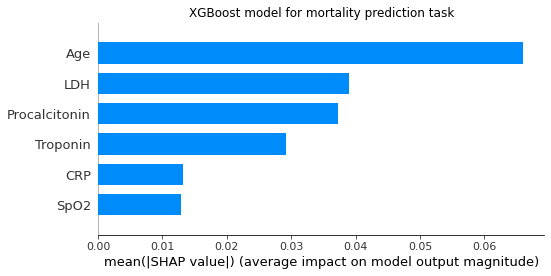

In [92]:
plt.figure(figsize=(8,5), dpi= 70)
fig, ax = plt.subplots()
plt.title("XGBoost model for mortality prediction task")
ax=shap.summary_plot(shap_values, plot_type='bar', feature_names=train_exp.columns[:-1])
plt.show()
fig.savefig('xgboost_mortality_feature.png', bbox_inches='tight')

IndexError: index 5 is out of bounds for axis 0 with size 5

<Figure size 560x350 with 0 Axes>

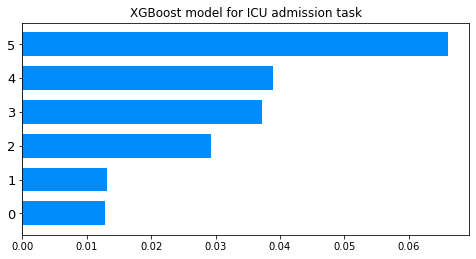

In [93]:
plt.figure(figsize=(8,5), dpi= 70)
fig, ax = plt.subplots()
plt.title("XGBoost model for ICU admission task")
ax=shap.summary_plot(shap_values, plot_type='bar', feature_names=train_icu.columns[:-1])
plt.show()
fig.savefig('xgboost_icu_feature.png', bbox_inches='tight')